# Decision Tree Regression

CART - Classification and Regression Tree

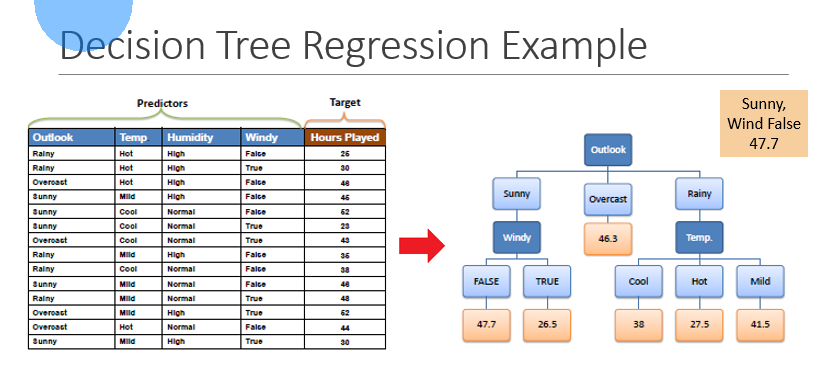

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data ingestion

In [2]:
import pandas as pd
df = pd.read_csv("PowerPlant.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Features 
1. AT - Ambient Temperature in degree Celsius
2. V - Vaccuum Pressure in Pascals
3. AP - Atmospheric Pressure in Pascals
4. RH - Relative Humidity in %
5. Target - PE - Power Output in Mega Watts

# Step 2 - Perform basic data quality checks

In [3]:
df.shape

(9568, 5)

In [4]:
# duplicates
df.duplicated().sum()

np.int64(41)

In [5]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(9527, 5)

In [6]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9527 non-null   float64
 1   V       9527 non-null   float64
 2   AP      9527 non-null   float64
 3   RH      9527 non-null   float64
 4   PE      9527 non-null   float64
dtypes: float64(5)
memory usage: 372.3 KB


# Step 3 - Seperate X and Y

In [8]:
X = df.drop(columns = ["PE"])
Y = df["PE"]

In [9]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [10]:
Y.head()

0    480.48
1    445.75
2    438.76
3    453.09
4    464.43
Name: PE, dtype: float64

<Axes: xlabel='PE', ylabel='Count'>

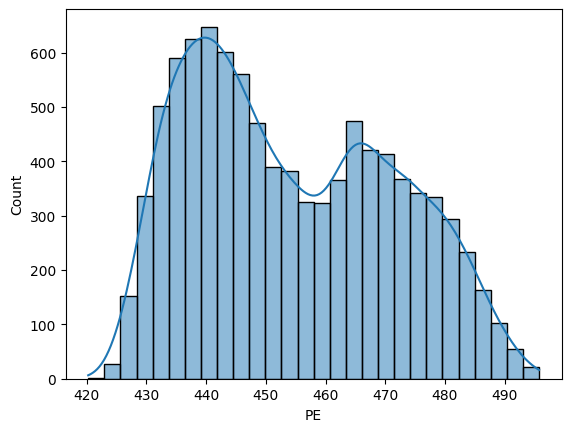

In [11]:
import seaborn as sns
sns.histplot(data=df, x="PE", kde=True)

# Step 4 - Train Test Split
test_size = 0.2 to 0.4

In [12]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [13]:
xtrain.head()

,AT,V,AP,RH
5695,18.52,58.41,1013.77,99.89
7300,8.51,39.66,1015.16,86.61
9066,13.07,42.18,1014.98,87.77
6424,30.07,69.82,1010.39,57.53
6773,13.52,42.34,1017.97,95.34


In [14]:
ytrain.head()

5695    446.68
7300    483.54
9066    461.71
6424    437.38
6773    463.71
Name: PE, dtype: float64

In [15]:
xtest.head()

,AT,V,AP,RH
1087,33.26,68.51,1012.49,52.68
6308,8.48,38.50,1013.50,66.51
8021,8.75,36.30,1015.61,57.53
9483,20.78,62.52,1017.58,73.30
4459,19.39,68.61,1011.09,96.51


In [16]:
ytest.head()

1087    429.38
6308    485.29
8021    480.40
9483    452.30
4459    446.47
Name: PE, dtype: float64

In [17]:
xtrain.shape, ytrain.shape

((7621, 4), (7621,))

In [18]:
xtest.shape, ytest.shape

((1906, 4), (1906,))

# Step 5 - Preprocess X data

In [19]:
xtrain.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [21]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [22]:
num_pipe.fit(xtrain)

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [23]:
xtrain_pre = num_pipe.transform(xtrain)
xtest_pre = num_pipe.transform(xtest)

In [24]:
xtrain_pre.head()

,AT,V,AP,RH
5695,-0.154993,0.323693,0.084610,1.818417
7300,-1.504241,-1.151828,0.319064,0.907637
9066,-0.889599,-0.953518,0.288703,0.987193
6424,1.401831,1.221597,-0.485502,-1.086753
6773,-0.828943,-0.940927,0.793033,1.506365


In [25]:
xtest_pre.head()

,AT,V,AP,RH
1087,1.831812,1.118507,-0.131290,-1.419379
6308,-1.508285,-1.243114,0.039069,-0.470879
8021,-1.471891,-1.416242,0.394967,-1.086753
9483,0.149632,0.647127,0.727251,-0.005201
4459,-0.037726,1.126376,-0.367431,1.586607


# Step 6 - Model Building

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

dtr = DecisionTreeRegressor(
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion="squared_error",
    random_state=42
)

scores = cross_val_score(dtr, xtrain_pre, ytrain, cv=5, scoring="r2")
print(scores)

[0.72192673 0.7062666  0.71486483 0.71181234 0.7162431 ]


In [27]:
scores.mean()

np.float64(0.7142227210616692)

In [28]:
scores.std()

np.float64(0.005156659982300732)

In [29]:
dtr.fit(xtrain_pre, ytrain)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,5
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [30]:
dtr.score(xtrain_pre, ytrain)

0.71765957297802

In [31]:
dtr.score(xtest_pre, ytest)

0.7251450398190283

# Hyperparameter tuning

In [32]:
params = {
    "max_depth": [8, 9, 10, 11, 12, 13, 14, 15],
    "min_samples_split": [5, 6, 7, 8],
    "min_samples_leaf": [5, 6, 7, 8],
    "criterion": ["squared_error", "absolute_error"]
}

In [33]:
from sklearn.model_selection import RandomizedSearchCV

base_model = DecisionTreeRegressor(random_state=42)
rscv = RandomizedSearchCV(base_model, params, cv=5, scoring="r2", random_state=42)
rscv.fit(xtrain_pre, ytrain)

,estimator,DecisionTreeR...ndom_state=42)
,param_distributions,"{'criterion': ['squared_error', 'absolute_error'], 'max_depth': [8, 9, ...], 'min_samples_leaf': [5, 6, ...], 'min_samples_split': [5, 6, ...]}"
,n_iter,10
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [34]:
rscv.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 8,
 'max_depth': 9,
 'criterion': 'squared_error'}

In [35]:
rscv.best_score_

np.float64(0.9404122155999506)

In [36]:
best_dtr = rscv.best_estimator_
best_dtr

,criterion,'squared_error'
,splitter,'best'
,max_depth,9
,min_samples_split,7
,min_samples_leaf,8
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [39]:
r2_train = best_dtr.score(xtrain_pre, ytrain)
print(r2_train)

0.9600389572563074


In [40]:
r2_test = best_dtr.score(xtest_pre, ytest)
print(r2_test)

0.9489672329560225


In [41]:
gen_error = abs(r2_train - r2_test)
print(gen_error)

0.011071724300284913


# Step 7 - Model evaluation in detail

In [42]:
from sklearn.metrics import (
    root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
)

In [44]:
def evaluate_model(model, x, y):
    # Get predictions on x
    ypred = model.predict(x)
    # Calculate the metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    # Print above results
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [45]:
print("Train Results : ")
evaluate_model(best_dtr, xtrain_pre, ytrain)

Train Results : 
RMSE : 3.39
MAE : 2.50
MAPE : 0.55%
R2 : 96.00%


In [46]:
print("Test Results : ")
evaluate_model(best_dtr, xtest_pre, ytest)

Test Results : 
RMSE : 3.92
MAE : 2.91
MAPE : 0.64%
R2 : 94.90%


# From above results both train and test results > 0.8 and are very close to each other
# You can use for out of sample prediction

# Plot the tree

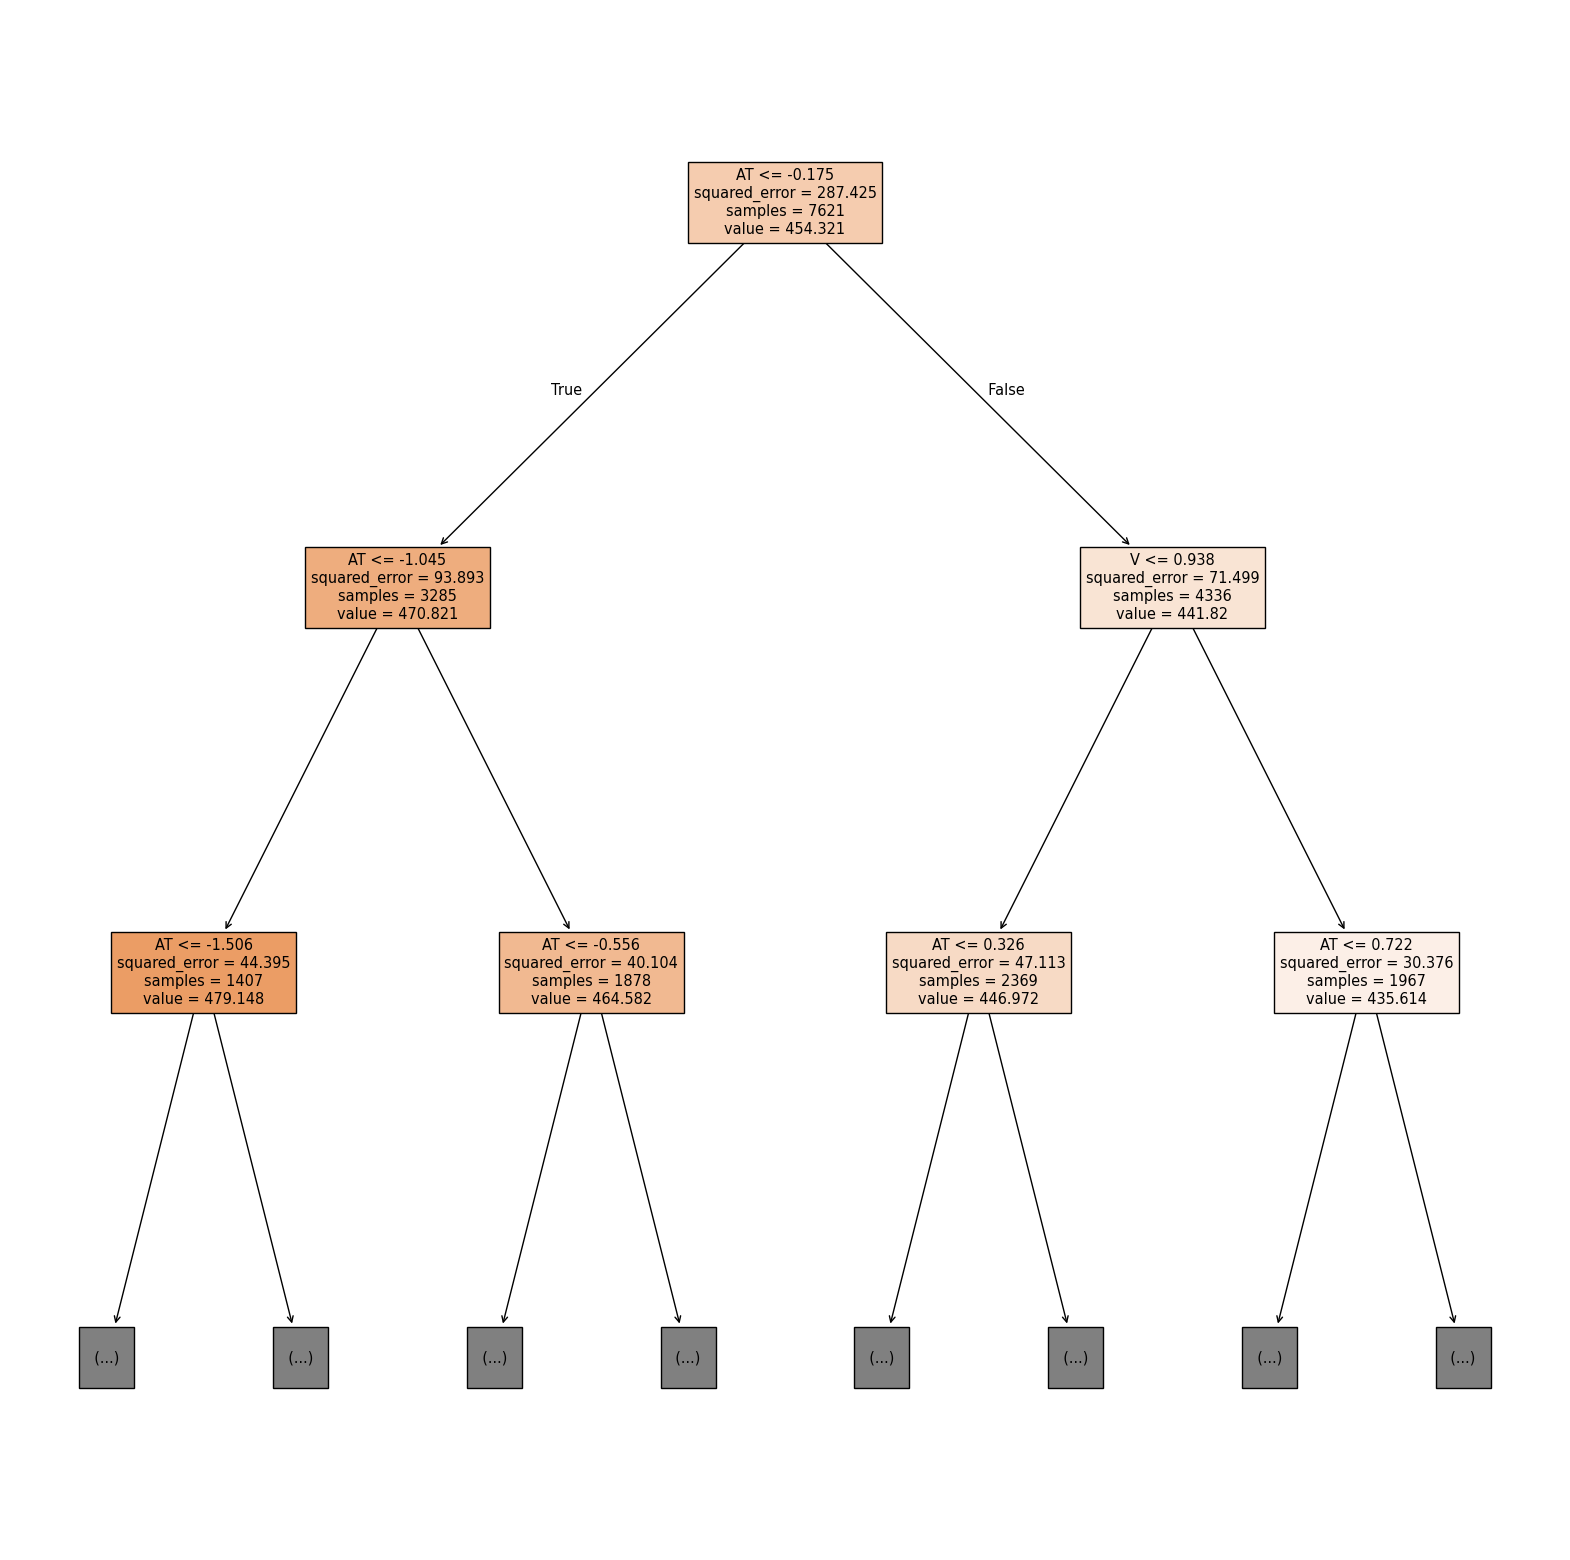

In [52]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(best_dtr, max_depth=2, feature_names=xtrain.columns, filled=True)
plt.show()

# Feature Importances

In [53]:
best_dtr.feature_importances_

array([0.89675573, 0.08629799, 0.00981417, 0.00713211])

In [54]:
xtrain.columns

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

In [55]:
imp = pd.Series(best_dtr.feature_importances_, index=xtrain.columns)
imp

AT    0.896756
V     0.086298
AP    0.009814
RH    0.007132
dtype: float64

In [56]:
imp_sorted = imp.sort_values(ascending=False)
imp_sorted

AT    0.896756
V     0.086298
AP    0.009814
RH    0.007132
dtype: float64

<Axes: title={'center': 'Feature Importance'}>

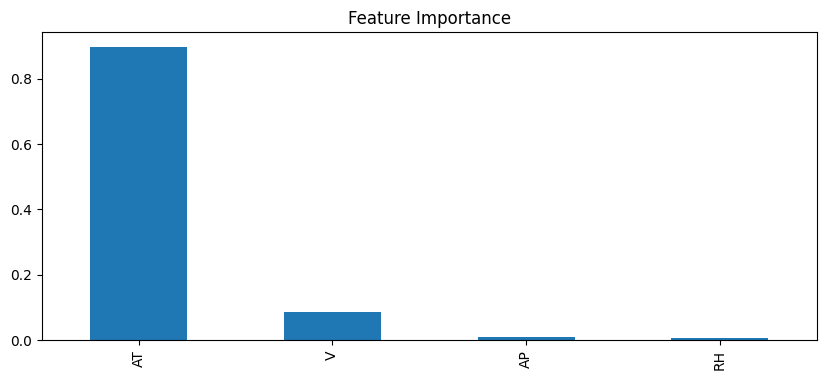

In [57]:
imp_sorted.plot(kind="bar", title="Feature Importance", figsize=(10, 4))

# Step 8 - Out of sample prediction

In [58]:
xnew = pd.read_csv("test_PowerPlant.csv")
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [63]:
xnew.shape

(100, 4)

In [59]:
num_pipe

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [60]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380123,0.355958,-0.596825,0.810249
1,1.241431,0.046688,-1.030313,-1.836363
2,1.107989,1.488371,-2.015358,0.857571
3,0.811451,0.626666,-0.318516,0.048294
4,-1.012258,-1.061330,2.112049,-0.164999


In [62]:
preds = best_dtr.predict(xnew_pre)
preds[0:5]

array([445.51393443, 439.19517241, 433.53547619, 443.73473118,
       465.58888889])

In [64]:
xnew["PE_pred"] = preds.round(2)
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,445.51
1,28.88,54.89,1007.16,46.60,439.20
2,27.89,73.21,1001.32,85.88,433.54
3,25.69,62.26,1011.38,74.08,443.73
4,12.16,40.81,1025.79,70.97,465.59
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,434.16
96,11.78,39.96,1011.37,82.95,475.36
97,5.62,41.38,1020.91,86.21,486.83
98,24.96,74.99,1008.25,80.52,437.97


<Axes: xlabel='PE_pred', ylabel='Count'>

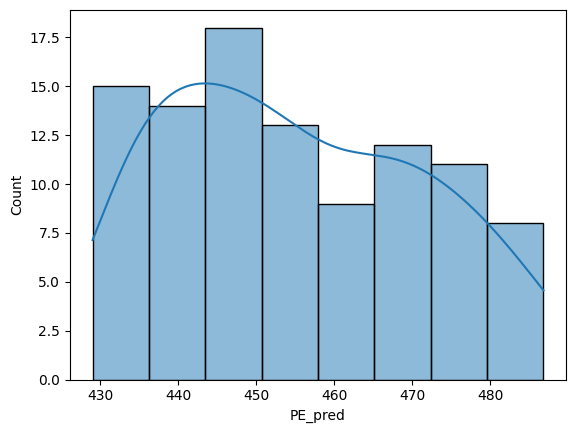

In [65]:
sns.histplot(data=xnew, x="PE_pred", kde=True)

In [66]:
xnew.to_csv("results.csv", index=False)

# Step 9 - Save preprocessor and model

In [67]:
import joblib

joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

In [68]:
joblib.dump(best_dtr, "dtr_model.joblib")

['dtr_model.joblib']

# Loading above files

In [69]:
p = joblib.load("pre.joblib")
p

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [70]:
m = joblib.load("dtr_model.joblib")
m

,criterion,'squared_error'
,splitter,'best'
,max_depth,9
,min_samples_split,7
,min_samples_leaf,8
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [71]:
m.score(xtrain_pre, ytrain)

0.9600389572563074

In [72]:
m.score(xtest_pre, ytest)

0.9489672329560225